# FML HW2 - Credit Score Classification

## Team Detective
- Tang Chia Tien
- Tu Nhu Pham
- Nicolas Reboullet
- Ariel Torjmane

# Import Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train_set.csv', index_col=0)
test_data = pd.read_csv('data/test_set.csv', index_col=0)

# Section 1 - Feature Engineering

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 84094 to 29219
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               70000 non-null  int64  
 1   Month                     70000 non-null  int64  
 2   Name                      70000 non-null  object 
 3   Age                       70000 non-null  float64
 4   SSN                       70000 non-null  float64
 5   Occupation                70000 non-null  object 
 6   Annual_Income             70000 non-null  float64
 7   Monthly_Inhand_Salary     70000 non-null  float64
 8   Num_Bank_Accounts         70000 non-null  float64
 9   Num_Credit_Card           70000 non-null  float64
 10  Interest_Rate             70000 non-null  float64
 11  Num_of_Loan               70000 non-null  float64
 12  Type_of_Loan              70000 non-null  object 
 13  Delay_from_due_date       70000 non-null  float64
 14  Num_of_

In [4]:
train_data.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.20,5564.016667,9.0,7.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,Poor
46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.59,1258.132500,7.0,9.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,Poor
147514,8183,5,Benf,47.0,324295086.0,Developer,9824.31,707.692500,7.0,4.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,Good
16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.62,7022.135000,0.0,4.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.92,10508.076667,5.0,6.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard


In [5]:
train_data["Credit_Score"].unique()

array(['Poor', 'Good', 'Standard'], dtype=object)

**Features for training:** float64(18), int64(2), object(6) => 26 features in total  
**Target Variable: object of 3 types('Poor', 'Good', 'Standard')**

First let's have the look into the balance of data:  
The Pie Chart show **the training dataset is very unbalanced**, so we will have to fine tune the model if there's "weights" parameter apllicable into to the model.

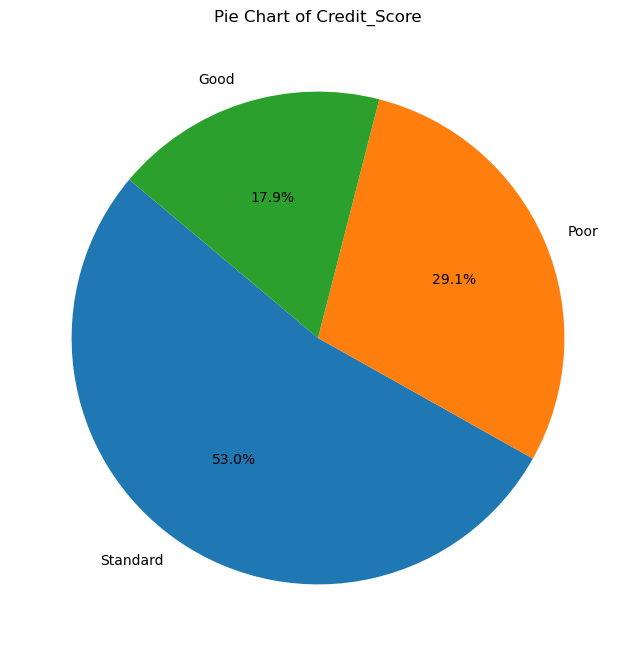

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

target_column = "Credit_Score"

# Pie chart of the target column
target_counts = train_data[target_column].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {target_column}')
plt.show()

### We drop features 'Customer_ID', 'Name', and 'SSN' first for reasons below:
 - Overfitting Prevention: These identifiers are unique to each individual and can lead to overfitting, as the model might learn patterns that are specific to the training data but don't generalize to new data.
 - Privacy: 'Name' and 'SSN' are personally identifiable information (PII). Including PII in a model raises privacy concerns and can lead to potential legal implications, especially under regulations like GDPR.
- Relevance: Such features usually do not hold meaningful information that contributes to the predictive power of the model.

In [7]:
train_data = train_data.drop(columns = ['Customer_ID', 'Name', 'SSN'])
test_data = test_data.drop(columns = ['Customer_ID', 'Name', 'SSN'])

### We also drop "Month" since it looks like irrevelant to the model and we are not doing time series forecasting.

In [8]:
train_data = train_data.drop(columns = ["Month"])
test_data = test_data.drop(columns = ["Month"])

### Structure of Current Features:

In [9]:
categorical_columns = ['Credit_Mix',
                      'Occupation',
                      'Payment_Behaviour',
                      'Payment_of_Min_Amount',
                      'Type_of_Loan']


numerical_columns = ['Age',
                    'Num_Bank_Accounts',
                    'Num_Credit_Card',
                    'Interest_Rate',
                    'Num_of_Loan',
                    'Delay_from_due_date',
                    'Num_of_Delayed_Payment',
                     'Changed_Credit_Limit',
                    'Num_Credit_Inquiries',
                    'Credit_History_Age',
                    'Credit_Utilization_Ratio',
                   'Annual_Income',
                   'Monthly_Inhand_Salary', 
                   'Changed_Credit_Limit', 
                   'Outstanding_Debt', 
                   'Total_EMI_per_month',
                   'Amount_invested_monthly', 
                   'Monthly_Balance']

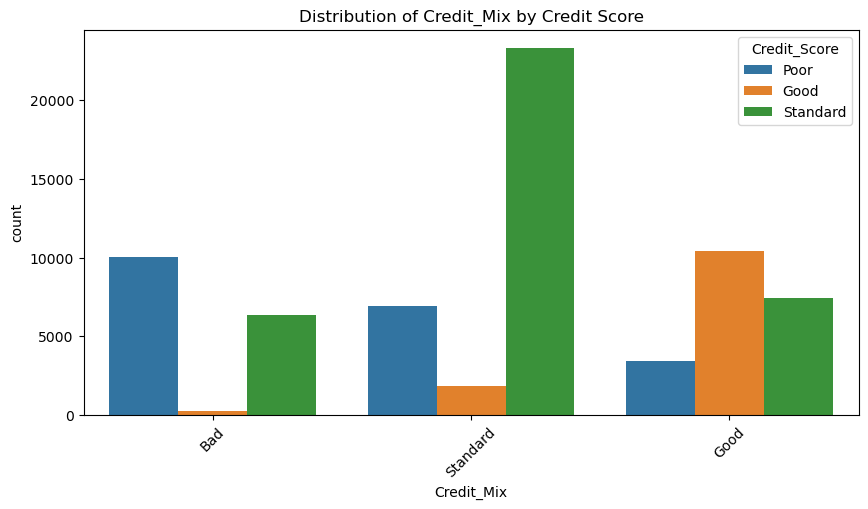

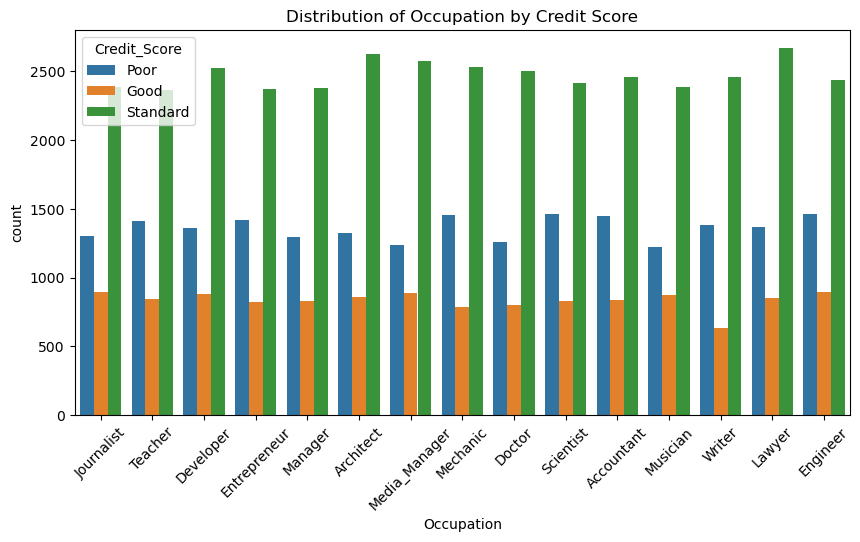

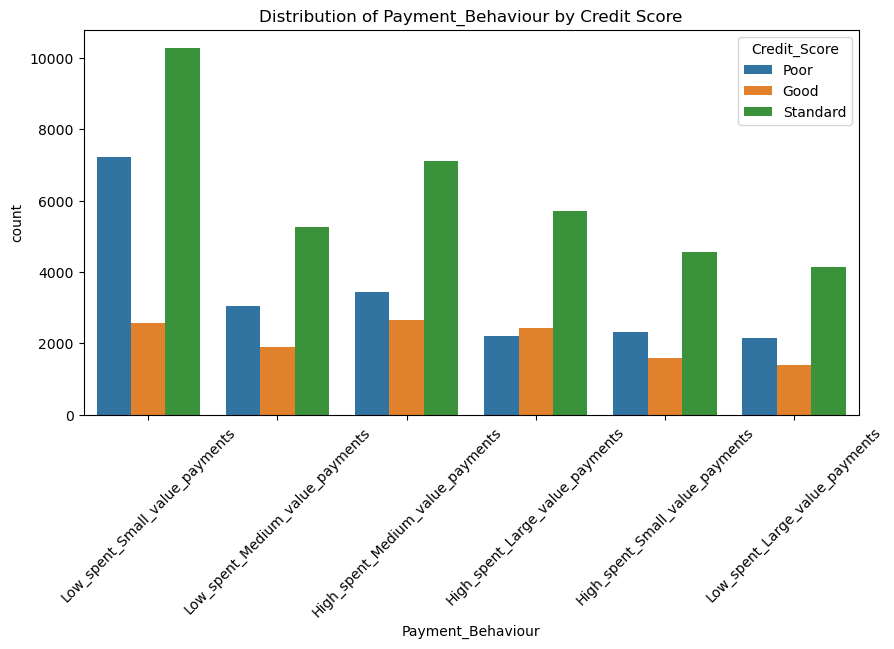

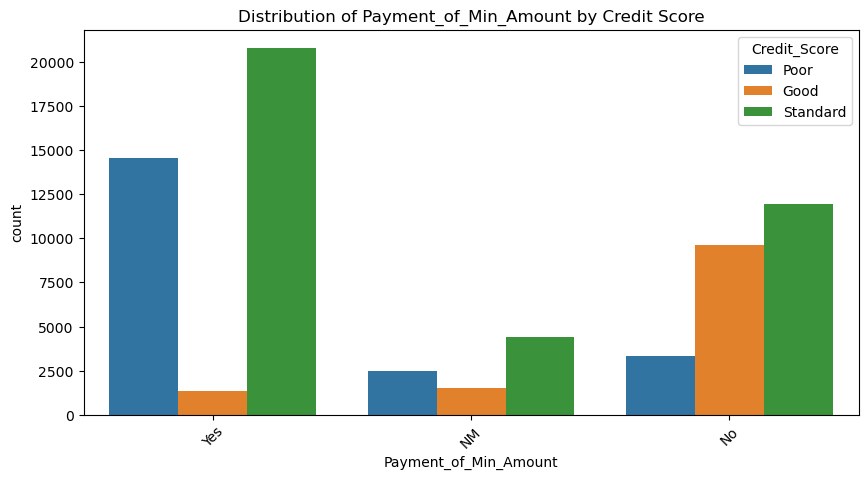

In [10]:
categorical_columns = ['Credit_Mix',
                      'Occupation',
                      'Payment_Behaviour',
                      'Payment_of_Min_Amount']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='Credit_Score', data=train_data)
    plt.title(f'Distribution of {column} by Credit Score')
    plt.xticks(rotation=45)  # Rotate the x labels if they overlap
    plt.show()

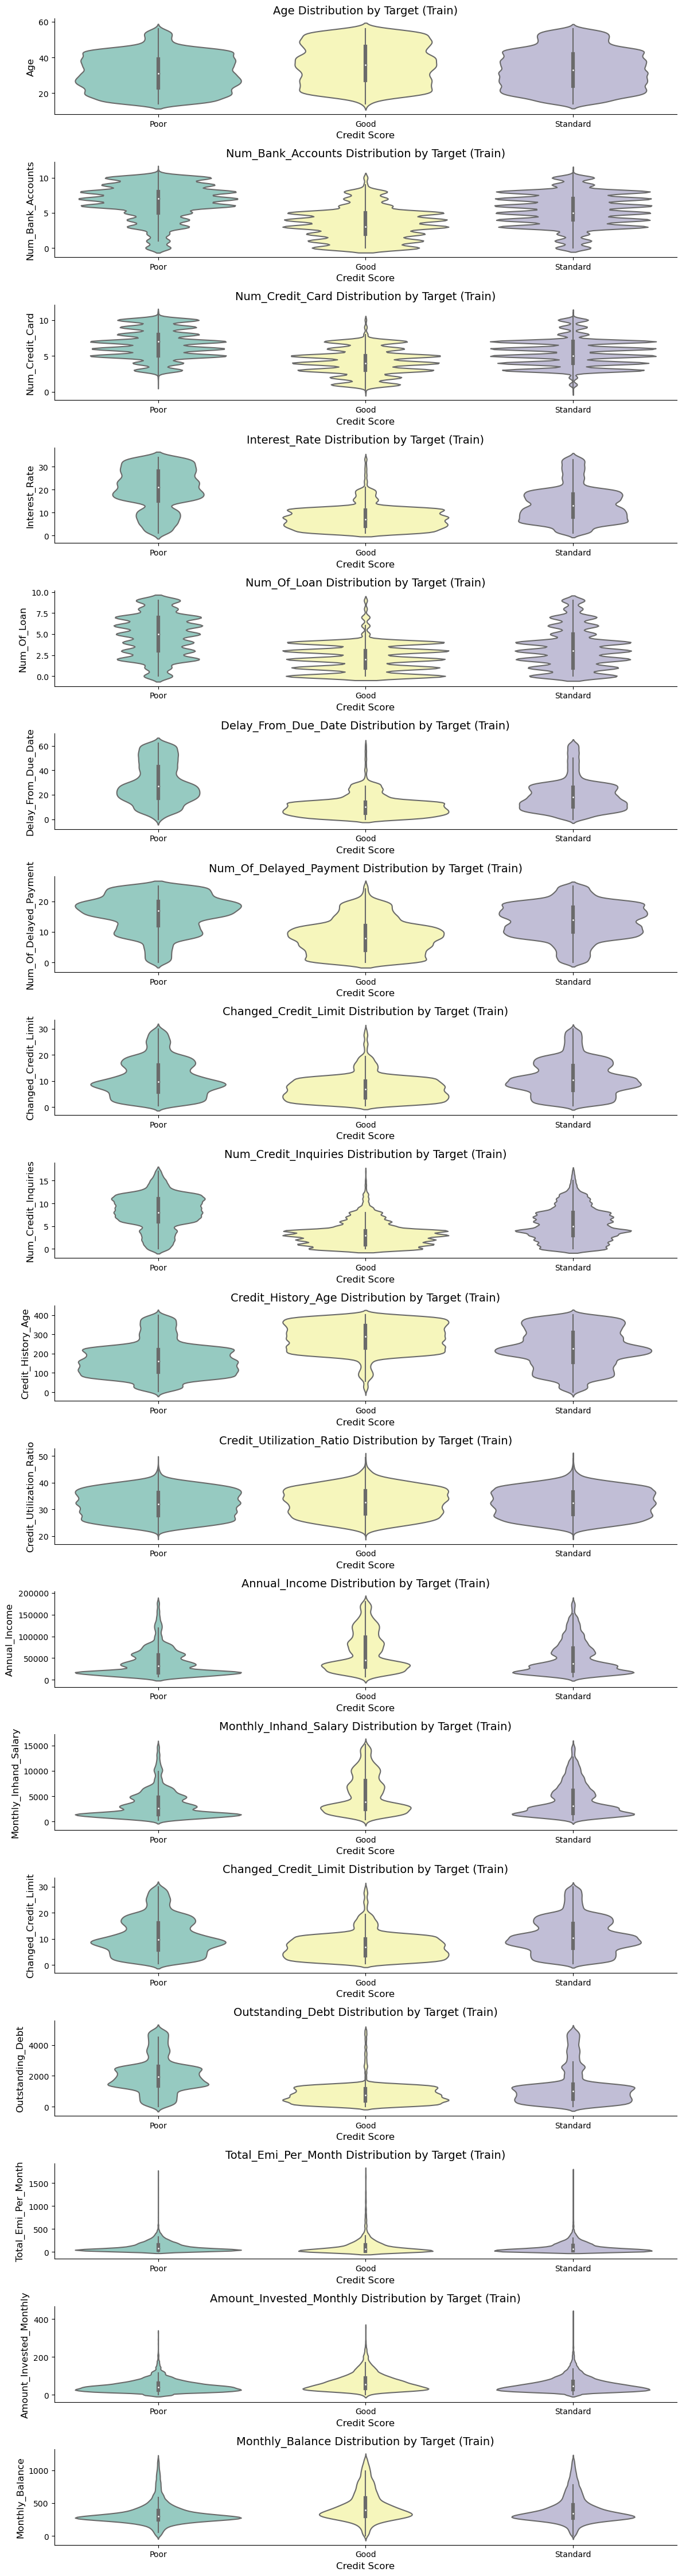

In [11]:
n_rows = len(numerical_columns)
sns.set_palette("Set3")

# Initialize a figure and subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(12, n_rows*2.5))

# Loop through each numerical column to create a violin plot on a subplot
for i, col in enumerate(numerical_columns):
    sns.violinplot(x='Credit_Score', y=col, data=train_data, ax=axes[i])
    axes[i].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=14)
    axes[i].set_xlabel('Credit Score', fontsize=12)
    axes[i].set_ylabel(col.title(), fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

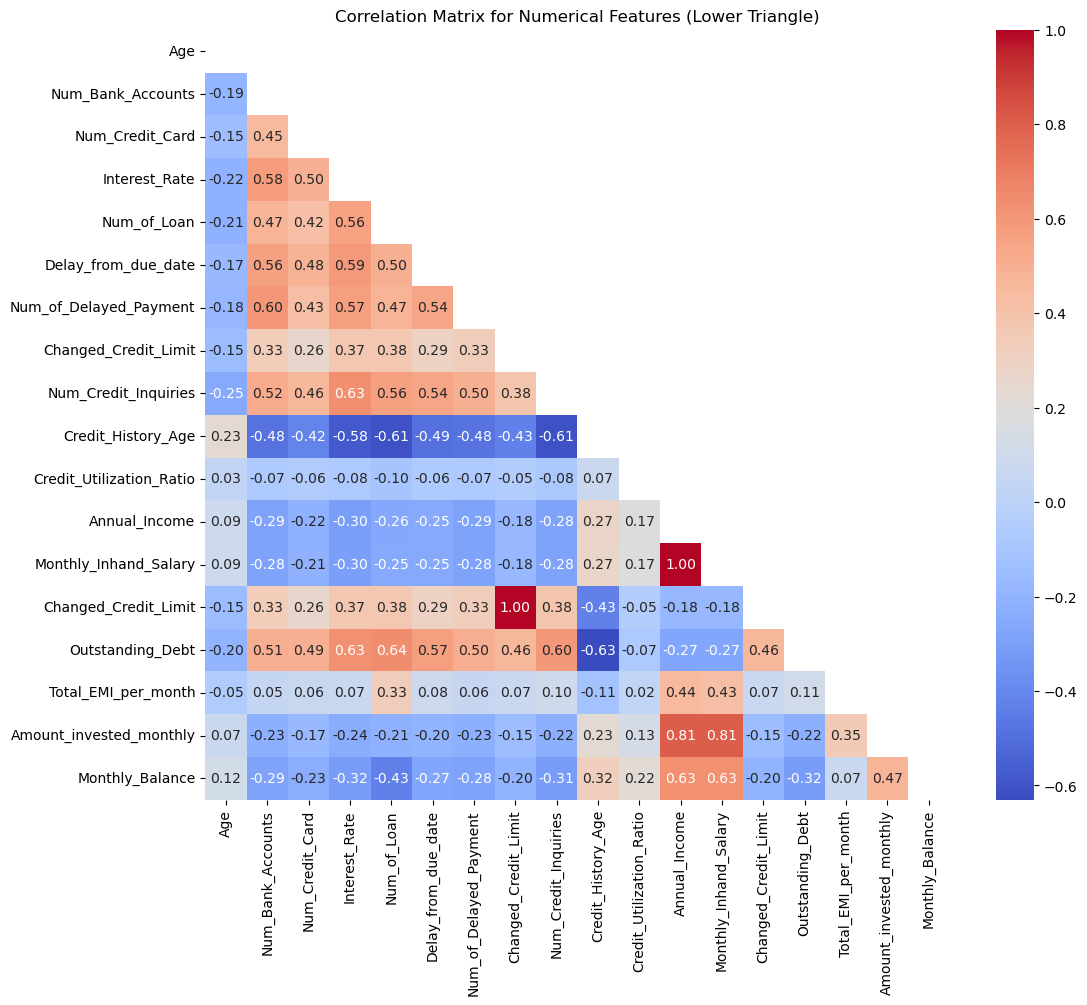

In [12]:
# Calculate the correlation matrix
corr_matrix = train_data[numerical_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features (Lower Triangle)')
plt.show()

### Expand the object in 'Type of Loan':
In transforming the 'Type of Loan' column into separate features, we enable the model to capture the unique influence of each loan category on the target variable. This approach avoids the potential pitfalls of ordinal encoding, where the model might improperly assume a hierarchy among loan types. 

In [13]:
# Transform Type_of_Loan into new columns and drop Type_of_Loan and new column "no data"
# Step 1: Extract and sort unique loan types from train_data
all_loans_train = train_data['Type_of_Loan'].str.cat(sep=',').split(',')
unique_loan_types_train = sorted(set([loan.strip().lower() for loan in all_loans_train]))

# Step 2: Create columns for each loan type initialized with zeros in train_data / test_data
for loan_type in unique_loan_types_train:
    train_data[loan_type] = 0

for loan_type in unique_loan_types_train:
    test_data[loan_type] = 0

# Step 3: Count and update occurrences in train_data/test_data
for index, row in train_data.iterrows():
    loans = row['Type_of_Loan'].lower().split(',')
    for loan in loans:
        loan = loan.strip()
        if loan in unique_loan_types_train:
            train_data.at[index, loan] += 1

for index, row in test_data.iterrows():
    loans = row['Type_of_Loan'].lower().split(',')
    for loan in loans:
        loan = loan.strip()
        if loan in unique_loan_types_train:
            test_data.at[index, loan] += 1

In [14]:
test_data = test_data.drop(columns=["no data", "Type_of_Loan"])
train_data = train_data.drop(columns=["no data", "Type_of_Loan"])

### Expand the object in 'Payment_Behaviour':  
Split the Payment Behavior according to its 2 parts: 'Amount_Spent' & 'Value_of_Payments' to catch more info from each part.

In [15]:
# Creating new columns by splitting the 'Payment_Behaviour' feature
train_data['Amount_Spent'] = train_data['Payment_Behaviour'].apply(lambda x: x.split('_')[0])
train_data['Value_of_Payments'] = train_data['Payment_Behaviour'].apply(lambda x: x.split('_')[2])
test_data['Amount_Spent'] = test_data['Payment_Behaviour'].apply(lambda x: x.split('_')[0])
test_data['Value_of_Payments'] = test_data['Payment_Behaviour'].apply(lambda x: x.split('_')[2])

In [16]:
test_data = test_data.drop(columns=['Payment_Behaviour'])
train_data = train_data.drop(columns=['Payment_Behaviour'])

### Based on the corr heat map and violin plots for the various features by 'Credit_Score' category, here are some feature engineering ideas we are going to do:

**Credit_Delay_Status**:  
Creating a binary class based on Delay_from_due_date exceeding a threshold (mean delay in 'Poor' credit score category) effectively highlights cases with significantly late payments, a key indicator of credit risk, enhancing the model's ability to differentiate between risk levels.

In [17]:
late = train_data[train_data["Credit_Score"]=="Poor"][["Delay_from_due_date"]].mean().values[0]

train_data['Credit_Delay_Status'] = np.where(train_data["Delay_from_due_date"] >= late, 1, 0)
test_data['Credit_Delay_Status'] = np.where(test_data["Delay_from_due_date"] >= late, 1, 0)

In [18]:
train_data = train_data.drop(columns=["Delay_from_due_date"])
test_data = test_data.drop(columns=["Delay_from_due_date"])

**Credit Utilization Ratio**:  
We've adopted a binary approach to classify Credit_Utilization_Ratio, distinguishing between 'High' (over 30%) and 'Low' (up to 30%) utilization. This decision aligns with the credit industry's benchmark, where maintaining a utilization ratio below 30% is generally seen as indicative of responsible credit management.

In [19]:
threshold = 30 # industrial percentage in %

train_data['High_Credit_Utilization'] = (train_data['Credit_Utilization_Ratio'] > threshold).astype(int)
test_data['High_Credit_Utilization'] = (test_data['Credit_Utilization_Ratio'] > threshold).astype(int)

In [20]:
train_data = train_data.drop(columns = ['Credit_Utilization_Ratio'])
test_data = test_data.drop(columns = ['Credit_Utilization_Ratio'])

**Income Related Features**:  
We drop 2 of them because their corr is between 1.0 and 0.7 which means 2 of them are redundant and provide no more information and 'Monthly_Inhand_Salary' is a direct reflection of liquid income. Also, Normalizing income by the cost of living or creating ratios of income to other financial obligations might provide additional insight.

In [21]:
test_data = test_data.drop(columns=['Annual_Income'])
train_data = train_data.drop(columns=['Annual_Income'])
test_data = test_data.drop(columns=['Monthly_Balance'])
train_data = train_data.drop(columns=['Monthly_Balance'])

**Amount_invested_monthly and EMI Features**:   
'Amount_invested_monthly' and 'Total_EMI_per_month' have wider distributions in some credit score categories. Creating features like Investmen Proportion or EMI-to-income ratio could be predictive. Additionally, 'Total_EMI_per_month' is likely correlated with 'Outstanding_Debt', which can serve as a proxy for the same underlying information. And also for 'Amount_invested_monthly', it's similar to 'Total_EMI_per_month', the spread of investment amounts does not visibly differ across credit score categories, which might limit its utility in distinguishing between them. So we will drop them after creating the new features.

In [22]:
train_data['EMI_to_Income_Ratio'] = train_data['Total_EMI_per_month'] / train_data['Monthly_Inhand_Salary']
test_data['EMI_to_Income_Ratio'] = test_data['Total_EMI_per_month'] / test_data['Monthly_Inhand_Salary']
train_data['EMI_to_Income_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
test_data['EMI_to_Income_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [23]:
train_data['Investment_Proportion'] = train_data['Amount_invested_monthly'] / train_data['Monthly_Inhand_Salary']
test_data['Investment_Proportion'] = test_data['Amount_invested_monthly'] / test_data['Monthly_Inhand_Salary']
train_data['Investment_Proportion'].replace([np.inf, -np.inf], np.nan, inplace=True)
test_data['Investment_Proportion'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [24]:
test_data = test_data.drop(columns=['Amount_invested_monthly'])
train_data = train_data.drop(columns=['Amount_invested_monthly'])
test_data = test_data.drop(columns=['Total_EMI_per_month'])
train_data = train_data.drop(columns=['Total_EMI_per_month'])

**Credit History Age**: If older credit histories correlate with better credit scores, a categorical feature indicating the age of the credit history (e.g., new, established, long-standing) might be informative.

In [25]:
new = train_data[train_data["Credit_Score"]=="Poor"][["Credit_History_Age"]].median().values[0]
established = train_data[train_data["Credit_Score"]=="Standard"][["Credit_History_Age"]].median().values[0]

train_data['Credit_Age_New'] = np.where(train_data["Credit_History_Age"] <= new, 1, 0)
train_data['Credit_Age_Established'] = np.where((train_data["Credit_History_Age"] > new) & (train_data["Credit_History_Age"] <= established), 1, 0)
train_data['Credit_Age_LongStanding'] = np.where(train_data["Credit_History_Age"] > established, 1, 0)
test_data['Credit_Age_New'] = np.where(test_data["Credit_History_Age"] <= new, 1, 0)
test_data['Credit_Age_Established'] = np.where((test_data["Credit_History_Age"] > new) & (test_data["Credit_History_Age"] <= established), 1, 0)
test_data['Credit_Age_LongStanding'] = np.where(test_data["Credit_History_Age"] > established, 1, 0)

**'Payment_of_Min_Amount'**:  "The feature 'Payment_of_Min_Amount' shows a similar distribution pattern across all credit score classes, indicating it may not significantly differentiate between them. Consequently, its presence might not contribute meaningful predictive power to the RandomForest model. By removing it, we focus the model's learning on more distinctive features that could drive better performance."

In [26]:
test_data = test_data.drop(columns=['Payment_of_Min_Amount'])
train_data = train_data.drop(columns=['Payment_of_Min_Amount'])

In [27]:
# Rest Columns need to be Normalized and OneHotEncoding
categorical_columns = ['Occupation',
                       'Credit_Mix',]


numerical_columns = ['Age',
                    'Num_Bank_Accounts',
                    'Num_Credit_Card',
                    'Interest_Rate',
                    'Num_of_Loan',
                    'Num_of_Delayed_Payment',
                    'Changed_Credit_Limit',
                    'Num_Credit_Inquiries',
                    'Credit_History_Age', 
                    'Monthly_Inhand_Salary',
                    'Outstanding_Debt']

# Section 2 - Model tuning and comparison

Comparemultipleclassifiers(e.g.,SVMs,RandomForest,Boosting,Logisticregression,KNN, ...).  

- For each classifier, explain the procedure that was followed to tackle parameter tuning and prevent overfitting.
- Report the cross-validated performance (on the training data) of the models you have explored, as well as the score on the test set (given by Kaggle).

- Report and code completeness, organization and readability will be worth 10 points. 

Best submissions will 
- (i) clearly deliver the solution, providing detailed explanations of each step
- (ii) provide clear, well organized and commented code.

** Discuss about any additional models that you have tested but did not perform well.

## Data Preprocessing - OneHotEncoding & Normalization

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Preprocessing with OneHotEncoder set to ignore unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)])

# Fit and transform the training data
X = preprocessor.fit_transform(train_data.drop('Credit_Score', axis=1))

# Label Encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_data['Credit_Score'])

In [29]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

# Training the Logistic Regression Model
model = LogisticRegression(max_iter=1000, class_weight = "balanced", penalty="l2", solver="lbfgs")

In [82]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the accuracy for each fold
print(scores)

# Print the mean accuracy and the standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

[0.66471429 0.66171429 0.66385714 0.66492857 0.65792857]
Mean accuracy: 0.6626285714285715
Standard deviation: 0.0026105750402576665


0.6627142857142857

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.83      0.62      2546
           1       0.64      0.68      0.66      4112
           2       0.81      0.60      0.69      7342

    accuracy                           0.66     14000
   macro avg       0.65      0.70      0.66     14000
weighted avg       0.70      0.66      0.67     14000



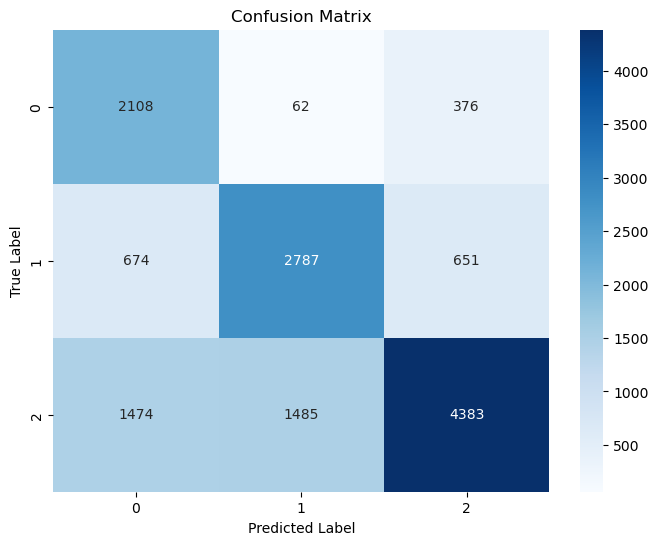

In [83]:
#Cross Validation
from sklearn.metrics import classification_report, confusion_matrix

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Classification report (Precision, Recall, F1-Score)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# =====

# KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
model = KNeighborsClassifier(n_neighbors=2, p=1)

In [100]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the accuracy for each fold
print(scores)

# Print the mean accuracy and the standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

[0.79535714 0.7975     0.79642857 0.80014286 0.80071429]
Mean accuracy: 0.7980285714285714
Standard deviation: 0.0020813064970575347


0.7974285714285714

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      2546
           1       0.75      0.92      0.83      4112
           2       0.90      0.70      0.78      7342

    accuracy                           0.80     14000
   macro avg       0.78      0.84      0.80     14000
weighted avg       0.82      0.80      0.80     14000



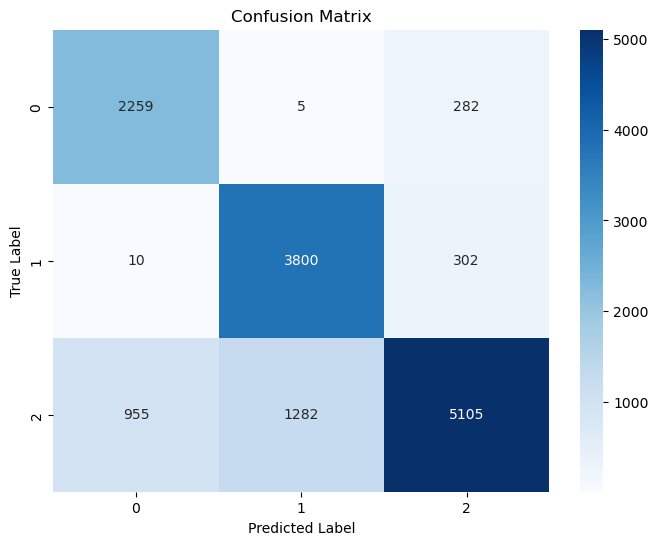

In [101]:
#Cross Validation
from sklearn.metrics import classification_report, confusion_matrix

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Classification report (Precision, Recall, F1-Score)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# =======

# SVM

In [36]:
from sklearn.svm import SVC

model = SVC(class_weight = "balanced", kernel = 'poly', C=10, random_state=42)

In [116]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the accuracy for each fold
print(scores)

# Print the mean accuracy and the standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

[0.69714286 0.69521429 0.69285714 0.6975     0.68857143]
Mean accuracy: 0.6942571428571428
Standard deviation: 0.003287763336236657


0.6972857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.82      0.64      2546
           1       0.68      0.76      0.72      4112
           2       0.84      0.62      0.71      7342

    accuracy                           0.70     14000
   macro avg       0.68      0.73      0.69     14000
weighted avg       0.74      0.70      0.70     14000



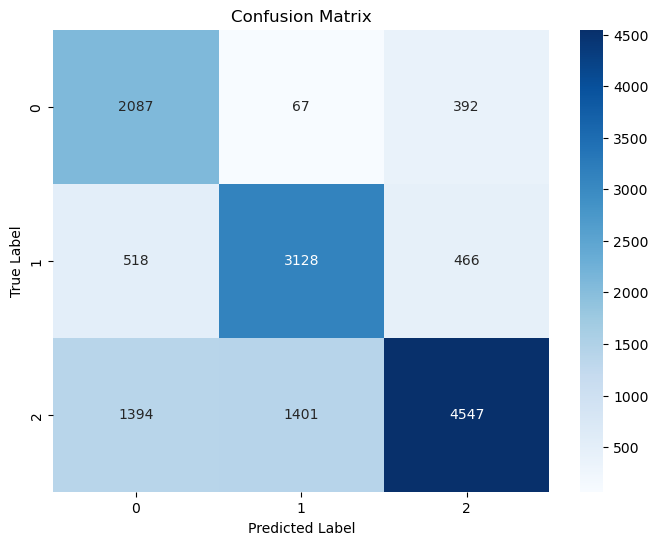

In [37]:
#Cross Validation
from sklearn.metrics import classification_report, confusion_matrix

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Classification report (Precision, Recall, F1-Score)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# =======

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight = "balanced", criterion="entropy", min_samples_split=3, random_state=42)

In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the accuracy for each fold
print(scores)

# Print the mean accuracy and the standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

[0.76571429 0.77171429 0.77414286 0.77971429 0.77321429]
Mean accuracy: 0.7729
Standard deviation: 0.004497073878577914


0.7746428571428572

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      2546
           1       0.76      0.78      0.77      4112
           2       0.80      0.78      0.79      7342

    accuracy                           0.77     14000
   macro avg       0.76      0.77      0.77     14000
weighted avg       0.78      0.77      0.77     14000



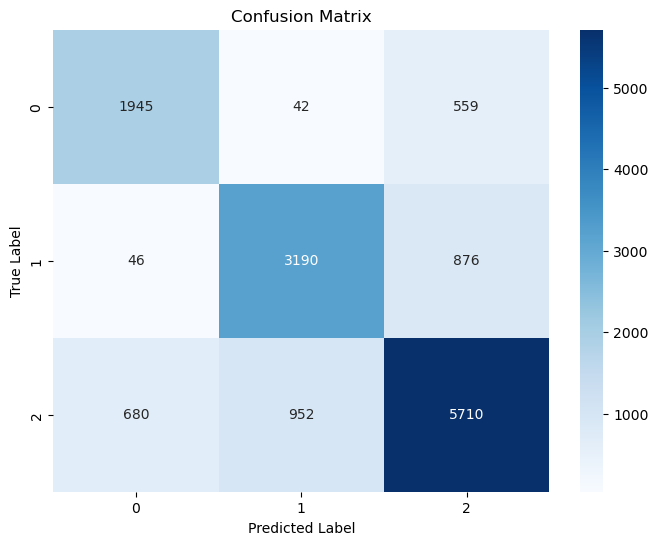

In [32]:
#Cross Validation
from sklearn.metrics import classification_report, confusion_matrix

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Classification report (Precision, Recall, F1-Score)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# =======

# GradientBoost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, max_depth = 10, min_samples_split=3, random_state=42)

In [40]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the accuracy for each fold
print(scores)

# Print the mean accuracy and the standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

[0.80235714 0.80071429 0.80185714 0.802      0.80064286]
Mean accuracy: 0.8015142857142857
Standard deviation: 0.0007018924855164909


0.7999285714285714

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2546
           1       0.80      0.81      0.80      4112
           2       0.81      0.81      0.81      7342

    accuracy                           0.80     14000
   macro avg       0.79      0.79      0.79     14000
weighted avg       0.80      0.80      0.80     14000



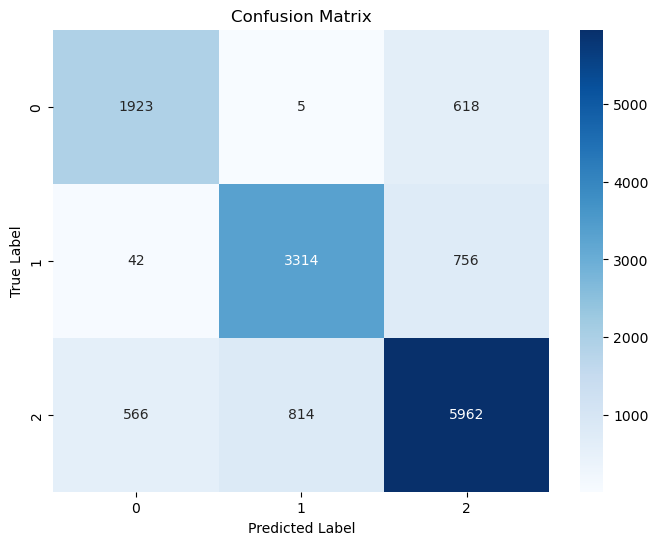

In [41]:
#Cross Validation
from sklearn.metrics import classification_report, confusion_matrix

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Classification report (Precision, Recall, F1-Score)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# =======

# RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(n_estimators=150, min_samples_split=3, class_weight = "balanced",random_state=42)

In [44]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the accuracy for each fold
print(scores)

# Print the mean accuracy and the standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

[0.81178571 0.81392857 0.81471429 0.818      0.813     ]
Mean accuracy: 0.8142857142857144
Standard deviation: 0.0020981041004503173


0.8090714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2546
           1       0.80      0.84      0.82      4112
           2       0.84      0.79      0.81      7342

    accuracy                           0.81     14000
   macro avg       0.80      0.81      0.80     14000
weighted avg       0.81      0.81      0.81     14000



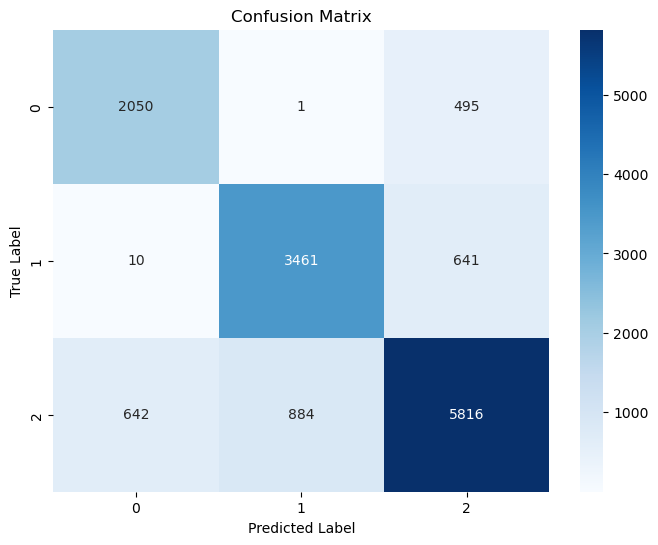

In [45]:
#Cross Validation
from sklearn.metrics import classification_report, confusion_matrix

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Classification report (Precision, Recall, F1-Score)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# =======

## Generating the Submission

Below you will find a function that does the predictions for the test set and generates a submission, this submission is to be uploaded to kaggle to update the leaderboard

In [34]:
# Transform the test data (without fitting)
X_test = preprocessor.transform(test_data)

def generate_submission():
    # Generate predictions
    list_of_predictions = model.predict(X_test)
    preds = label_encoder.inverse_transform(list_of_predictions)
    df = pd.DataFrame({'Credit_Score': preds}, index=test_data.index)
    df.to_csv(f"{type(model).__name__}_submission.csv")

In [102]:
generate_submission()